### Refining Data

In [32]:
import pandas as pd


In [33]:
# crop_yield = pd.read_csv('Data\crop_yield.csv')
# crop_data = pd.read_csv('Data\Crop_Data.csv')



In [34]:
crop_yield = pd.read_csv('E:\competition\SITNovate hack\SITNovate_blueberry\SITNovate\Data\crop_yield.csv')
crop_data = pd.read_csv('E:\competition\SITNovate hack\SITNovate_blueberry\SITNovate\Data\Crop_Data.csv')

In [35]:
crop_yield.info()
crop_yield.drop(["Crop_Year","Area","Fertilizer","Pesticide","Yield"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [36]:
crop_data.info()
crop_data.drop(["Area","Price","Rainfall"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              5373 non-null   object 
 1   Season            5373 non-null   object 
 2   State             5373 non-null   object 
 3   Area              5373 non-null   float64
 4   Soil Type         5373 non-null   object 
 5   Pesticide Usage   5373 non-null   object 
 6   pH                5373 non-null   object 
 7   Temperature       5373 non-null   object 
 8   Fertilizer Usage  5373 non-null   object 
 9   Price             5373 non-null   float64
 10  Rainfall          5373 non-null   float64
dtypes: float64(3), object(8)
memory usage: 461.9+ KB


In [37]:
# Clean whitespace in key columns
for df in [crop_yield, crop_data]:
    df['Crop'] = df['Crop'].str.strip()
    df['Season'] = df['Season'].str.strip()
    df['State'] = df['State'].str.strip()

In [38]:
final_merged_df = pd.merge(
    crop_yield,
    crop_data,
    on=['Crop', 'Season', 'State'],
    how='inner'
)

In [39]:
print("Final Merged DataFrame Columns:", final_merged_df.columns.tolist())
print("\nSample Rows:")
print(final_merged_df.head())

Final Merged DataFrame Columns: ['Crop', 'Season', 'State', 'Production', 'Annual_Rainfall', 'Soil Type', 'Pesticide Usage', 'pH', 'Temperature', 'Fertilizer Usage']

Sample Rows:
           Crop  Season  State  Production  Annual_Rainfall      Soil Type  \
0  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
1  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
2  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
3  Cotton(lint)  Kharif  Assam         794           2051.4     Black Soil   
4  Cotton(lint)  Kharif  Assam         794           2051.4  Alluvial Soil   

  Pesticide Usage       pH Temperature Fertilizer Usage  
0             low  Average      Medium             High  
1            high  Average      Medium              Low  
2             low     High      Medium           Medium  
3             low      Low        High             High  
4            high     High        High              Low  


In [40]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95321 entries, 0 to 95320
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              95321 non-null  object 
 1   Season            95321 non-null  object 
 2   State             95321 non-null  object 
 3   Production        95321 non-null  int64  
 4   Annual_Rainfall   95321 non-null  float64
 5   Soil Type         95321 non-null  object 
 6   Pesticide Usage   95321 non-null  object 
 7   pH                95321 non-null  object 
 8   Temperature       95321 non-null  object 
 9   Fertilizer Usage  95321 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.3+ MB


In [41]:
final_merged_df.to_csv("data/new_data.csv")

### Data preprocessing Start

In [42]:
final_merged_df.to_csv("data/new_data.csv")

In [43]:
final_merged_df

,Crop,Season,State,Production,Annual_Rainfall,Soil Type,Pesticide Usage,pH,Temperature,Fertilizer Usage
0,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,Average,Medium,High
1,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,high,Average,Medium,Low
2,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,High,Medium,Medium
3,Cotton(lint),Kharif,Assam,794,2051.4,Black Soil,low,Low,High,High
4,Cotton(lint),Kharif,Assam,794,2051.4,Alluvial Soil,high,High,High,Low
...,...,...,...,...,...,...,...,...,...,...
95316,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Red/Yellow Soil,high,Low,Medium,Medium
95317,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Laterile Soil,low,High,High,High
95318,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Red/Yellow Soil,high,Low,Low,Low
95319,Wheat,Rabi,Jammu and Kashmir,392160,1356.2,Alluvial Soil,low,Average,Medium,Medium


In [44]:
final_merged_df.isnull().sum()

Crop                0
Season              0
State               0
Production          0
Annual_Rainfall     0
Soil Type           0
Pesticide Usage     0
pH                  0
Temperature         0
Fertilizer Usage    0
dtype: int64

In [45]:
final_merged_df["pH"].dtype

dtype('O')

In [46]:
final_merged_df["Production"].describe()

count    9.532100e+04
mean     2.589680e+06
std      1.026405e+07
min      0.000000e+00
25%      1.464900e+04
50%      1.362810e+05
75%      1.028700e+06
max      1.796982e+08
Name: Production, dtype: float64

In [47]:
Q1 = final_merged_df["Production"].quantile(0.25)
Q3 = final_merged_df["Production"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(95321):
    if(final_merged_df.loc[i,"Production"]<lower_bound or final_merged_df.loc[i,"Production"]>upper_bound):
        final_merged_df.drop(i,axis=0,inplace=True)

<Axes: ylabel='Production'>

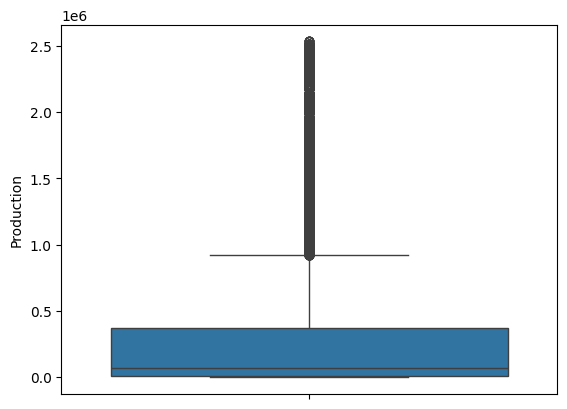

In [48]:
import seaborn as sns
sns.boxplot(final_merged_df["Production"])

<Axes: xlabel='Production', ylabel='Count'>

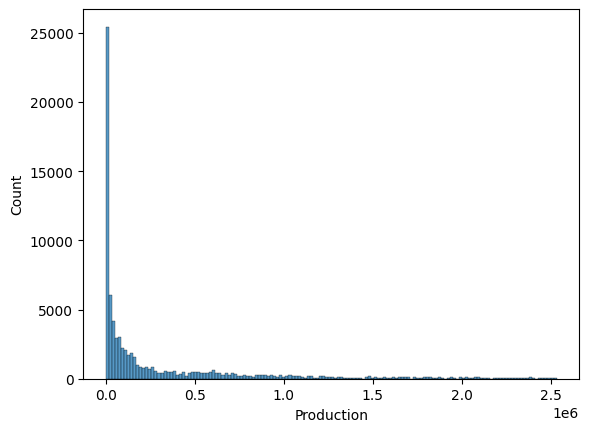

In [49]:
import seaborn as sns
sns.histplot(final_merged_df["Production"])

In [50]:
final_merged_df["Production"].value_counts()

Production
2         145
6         119
226       119
80        113
3          99
         ... 
520983      1
200290      1
181900      1
12410       1
5560        1
Name: count, Length: 4148, dtype: int64

In [51]:
final_merged_df["Soil Type"].value_counts()

Soil Type
Alluvial Soil      32793
Black Soil         16992
Red/Yellow Soil    16896
Laterile Soil      11979
Name: count, dtype: int64

In [52]:
for i in list(set(final_merged_df["Soil Type"])):
    print(i,":",final_merged_df[final_merged_df["Soil Type"]==i]["Production"].mean())

Black Soil : 356285.7525894539
Alluvial Soil : 303836.558198396
Laterile Soil : 262712.4128057434
Red/Yellow Soil : 279665.08617424243


In [53]:
freq_encode_cols = ["Crop","Season","State","Soil Type"]
for i in freq_encode_cols:
    freq_map = final_merged_df.loc[:,i].value_counts().to_dict()
    final_merged_df.loc[:,i+'_f'] = final_merged_df.loc[:,i].map(freq_map)
    final_merged_df.drop(columns=[i],inplace=True)

In [54]:
final_merged_df["Pesticide Usage"].value_counts()

Pesticide Usage
low     39363
high    39297
Name: count, dtype: int64

In [55]:
ordinal_encoding_cols = {"pH":["Low","Medium","High"],"Temperature":["low","Medium","High"],"Fertilizer Usage":["low","Average","High"],"Pesticide Usage":["Low","High"]}
final_merged_df["pH"] = final_merged_df["pH"].replace({"Average":1,"High":2,"Low":0})
final_merged_df["Temperature"] = final_merged_df["Temperature"].replace({"Low":0,"Medium":1,"High":2})
final_merged_df["Fertilizer Usage"]= final_merged_df["Fertilizer Usage"].replace({"High":2,"Low":0,"Medium":1})
final_merged_df["Pesticide Usage"]=final_merged_df["Pesticide Usage"].replace({"low":0,"high":1})

C:\Users\Shiva\AppData\Local\Temp\ipykernel_19172\4070700315.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_merged_df["pH"] = final_merged_df["pH"].replace({"Average":1,"High":2,"Low":0})
C:\Users\Shiva\AppData\Local\Temp\ipykernel_19172\4070700315.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_merged_df["Temperature"] = final_merged_df["Temperature"].replace({"Low":0,"Medium":1,"High":2})
C:\Users\Shiva\AppData\Local\Temp\ipykernel_19172\4070700315.py:4: FutureWarning: Downcasting behavior in `replace` is de

In [56]:
final_merged_df

,Production,Annual_Rainfall,Pesticide Usage,pH,Temperature,Fertilizer Usage,Crop_f,Season_f,State_f,Soil Type_f
0,794,2051.4,0,1,1,2,7159,30065,4192,16992
1,794,2051.4,1,1,1,0,7159,30065,4192,16992
2,794,2051.4,0,2,1,1,7159,30065,4192,16992
3,794,2051.4,0,0,2,2,7159,30065,4192,16992
4,794,2051.4,1,2,2,0,7159,30065,4192,32793
...,...,...,...,...,...,...,...,...,...,...
95316,392160,1356.2,1,0,1,1,8491,17297,1894,16896
95317,392160,1356.2,0,2,2,2,8491,17297,1894,11979
95318,392160,1356.2,1,0,0,0,8491,17297,1894,16896
95319,392160,1356.2,0,1,1,1,8491,17297,1894,32793


In [61]:

from sklearn.preprocessing import PowerTransformer
data = final_merged_df['Production']
pt = PowerTransformer(method='yeo-johnson')
final_merged_df['Production_transformed'] = pd.DataFrame(pt.fit_transform(data.values.reshape(-1, 1)))
final_merged_df.drop(columns=['Production'],inplace=True)

In [69]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
final_merged_df["Production_transformed"] = mns.fit_transform(final_merged_df[["Production_transformed"]])

In [62]:
final_merged_df

,Annual_Rainfall,Pesticide Usage,pH,Temperature,Fertilizer Usage,Crop_f,Season_f,State_f,Soil Type_f,Production_transformed
0,2051.4,0,1,1,2,7159,30065,4192,16992,-0.958857
1,2051.4,1,1,1,0,7159,30065,4192,16992,-0.958857
2,2051.4,0,2,1,1,7159,30065,4192,16992,-0.958857
3,2051.4,0,0,2,2,7159,30065,4192,16992,-0.958857
4,2051.4,1,2,2,0,7159,30065,4192,32793,-0.958857
...,...,...,...,...,...,...,...,...,...,...
95316,1356.2,1,0,1,1,8491,17297,1894,16896,NaN
95317,1356.2,0,2,2,2,8491,17297,1894,11979,NaN
95318,1356.2,1,0,0,0,8491,17297,1894,16896,NaN
95319,1356.2,0,1,1,1,8491,17297,1894,32793,NaN


<Axes: ylabel='Production_transformed'>

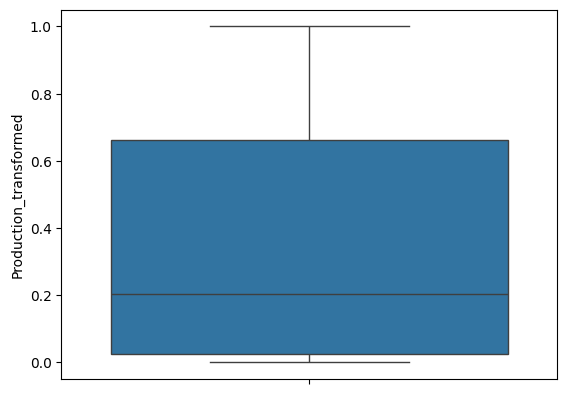

In [70]:
sns.boxplot(final_merged_df["Production_transformed"])

<Axes: xlabel='Production_transformed', ylabel='Count'>

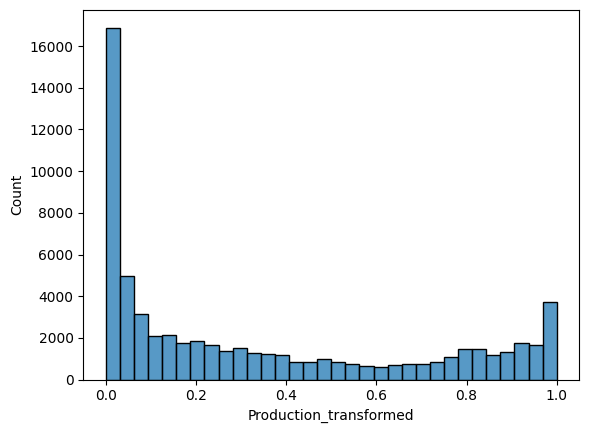

In [71]:
import seaborn as sns
sns.histplot(final_merged_df["Production_transformed"])

In [74]:
final_merged_df.columns

Index(['Annual_Rainfall', 'Pesticide Usage', 'pH', 'Temperature',
       'Fertilizer Usage', 'Crop_f', 'Season_f', 'State_f', 'Soil Type_f',
       'Production_transformed'],
      dtype='object')

In [96]:
from sklearn.impute import KNNImputer
knni = KNNImputer(n_neighbors=5)
final_merged_df['Production_transformed']=knni.fit_transform(final_merged_df[['Production_transformed']])

In [98]:
# Check for NaN values in the target variable
print(final_merged_df['Production_transformed'].isna().sum())

# Check for infinite values in the target variable
print(np.isinf(final_merged_df['Production_transformed']).sum())

# Check for excessively large values
print(final_merged_df['Production_transformed'].describe())

0
0
count    78660.000000
mean         0.340769
std          0.314286
min          0.000000
25%          0.047108
50%          0.340769
75%          0.498301
max          1.000000
Name: Production_transformed, dtype: float64


## Model Training

In [99]:
from sklearn.model_selection import train_test_split
x=final_merged_df.drop('Production_transformed' , axis=1)
y=final_merged_df['Production_transformed']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import root_mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [101]:
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


def xgb_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, subsample, colsample_bytree):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',           
        'random_state': 42
    }

    # Perform cross-validation
    cv_results = cross_val_score(
        XGBRegressor(**params),
        x_train, y_train,
        scoring='neg_mean_squared_error',  # Use negative MSE for regression
        cv=5
    )

    
    return cv_results.mean()







In [102]:
pbounds = {
    'max_depth': (3, 10),          
    'learning_rate': (0.01, 0.2),  
    'n_estimators': (100, 1000),   
    'gamma': (0, 5),               
    'min_child_weight': (1, 10),   
    'subsample': (0.6, 1.0),       
    'colsample_bytree': (0.6, 1.0) 
}


optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=42
)

In [104]:
final_merged_df['Production_transformed']

0        0.002414
1        0.002414
2        0.002414
3        0.002414
4        0.002414
           ...   
95316    0.340769
95317    0.340769
95318    0.340769
95319    0.340769
95320    0.340769
Name: Production_transformed, Length: 78660, dtype: float64

In [106]:
optimizer.maximize(
    init_points=10,  
    n_iter=50     
)


print("Best Parameters:", optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 13        | -0.09057  | 0.7244    | 1.626     | 0.1486    | 7.463     | 8.985     | 525.0     | 0.6478    |
| 14        | -0.09504  | 0.8853    | 3.804     | 0.1166    | 8.397     | 5.444     | 570.5     | 0.771     |
| 15        | -0.08655  | 0.6102    | 0.5395    | 0.01597   | 7.455     | 3.829     | 557.7     | 0.963     |
| 16        | -0.09459  | 0.6997    | 2.052     | 0.1536    | 4.602     | 1.693     | 360.8     | 0.6645    |
| 17        | -0.09441  | 0.9719    | 4.041     | 0.1303    | 9.1       | 8.233     | 267.9     | 0.957     |
| 18        | -0.09574  | 0.8157    | 4.037     | 0.1803    | 5.226     | 1.99      | 305.1     | 0.7708    |
| 19        | -0.09682  | 0.9272    | 4.304     | 0.01132   | 6.575     | 4.757     | 299.9     | 0.6479    |
| 20      

In [107]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

params = {
            'max_depth': int(8.982326113727868),
        'learning_rate': 0.19577244563705928,
        'n_estimators': int(229.64849174665383),
        'gamma': 0.0037780962332611967,
        'min_child_weight': 1.9265599902456065,
        'subsample': 0.6601917715832821,
        'colsample_bytree': 0.9570296280445566,
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',           
        'random_state': 42


}

model = xgb.XGBRegressor(**params)

scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),  # Negative MSE
    'mae': make_scorer(mean_absolute_error, greater_is_better=False), # Negative MAE
    'r2': make_scorer(r2_score)                                       # R² Score
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(model, x_train, y_train, scoring=scoring['mse'], cv=kf)
mae_scores = cross_val_score(model, x_train, y_train, scoring=scoring['mae'], cv=kf)
r2_scores = cross_val_score(model, x_train, y_train, scoring=scoring['r2'], cv=kf)

In [ ]:
print(f'Mean squared error on training data (Negative): {np.mean(mse_scores):.4f}')
print(f'Mean absolute error scores on training data (Negative) : {np.mean(mae_scores):.4f}')
print(f'Mean R2_score on training data: {np.mean(r2_scores):.4f}')

Mean squared error on training data: -0.0497
Mean absolute error scores on training data : -0.1570
Mean R2_score on training data: 0.4965


In [110]:
print(x_train.shape)
print(x_test.shape)

(62928, 9)
(15732, 9)


In [111]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9570296280445566, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None,
             gamma=0.0037780962332611967, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.19577244563705928, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1.9265599902456065, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=229,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [112]:
y_pred = model.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred , y_test)
print(mse)

0.04764902957987716
